In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import os

if os.path.isfile('customers_cleaned.pkl'):
    print("File exists")
else:
    print("File does not exist")


print(os.getcwd())


File exists
C:\Users\adria\Data Science for Biz


In [3]:
df = pd.read_pickle('customers_cleaned.pkl')  # replace 'filename.pkl' with your file path
df.head()


,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_bin,age_group,Overall_transaction_count,...,Graphic_bought_most,Perceived_color_bought_most,Section_bought_most,Earliest_transaction_date,Recency,Tenure,Transaction_count_revised,Recency_days,Tenure_days,Unique_items
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,45-54,Adult,21.0,...,Solid,Dark,Womens Tailoring,2018-12-27,17 days,618 days,19.0,17.0,618.0,19.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,25-34,Adult,86.0,...,Solid,Dark,"Womens Swimwear, beachwear",2018-09-21,76 days,656 days,64.0,76.0,656.0,64.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,25-34,Young,18.0,...,Solid,Dark,Men Suits & Tailoring,2018-09-20,7 days,726 days,14.0,7.0,726.0,14.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,55-64,Senior,2.0,...,Solid,Dark,Ladies H&M Sport,2019-06-09,471 days,0 days,2.0,471.0,0.0,2.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,45-54,Senior,13.0,...,Solid,Dark,Womens Lingerie,2018-10-12,41 days,670 days,12.0,41.0,670.0,12.0


In [4]:
df.dtypes

customer_id                                     object
FN                                             float64
Active                                         float64
club_member_status                              object
fashion_news_frequency                          object
age                                            float64
postal_code                                     object
age_bin                                       category
age_group                                       object
Overall_transaction_count                      float64
Overall_transaction_count_channel_1            float64
Overall_transaction_count_channel_2            float64
Last_transaction_date                   datetime64[ns]
Overall_transacted                             float64
Product_type_bought_most                        object
Graphic_bought_most                             object
Perceived_color_bought_most                     object
Section_bought_most                             object
Earliest_t

In [5]:
most_recent= df['Last_transaction_date'].max()
most_recent

df['First_Transaction'] = (most_recent - df['Earliest_transaction_date']).dt.days


In [6]:
df['Recency_days'] = pd.to_numeric(df['Recency_days'], errors='coerce')

# Perform the filter operation
filtered_df = df[(df['age'] >= 35) & (df['age'] <= 44) & (df['Active']==1.0)& (df['fashion_news_frequency']=='Regularly')]
filtered_df

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_bin,age_group,Overall_transaction_count,...,Perceived_color_bought_most,Section_bought_most,Earliest_transaction_date,Recency,Tenure,Transaction_count_revised,Recency_days,Tenure_days,Unique_items,First_Transaction
19,0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...,1.0,1.0,ACTIVE,Regularly,41.0,5b5f53c673d0fc0774fbbd3b2174b799c99f12029605ee...,35-44,Adult,7.0,...,Medium Dusty,"Womens Swimwear, beachwear",2019-06-22,440 days,18 days,7.0,440.0,18.0,7.0,458.0
25,000114c6996ef5703a8d455faf2103f8488d3928348e07...,1.0,1.0,PRE-CREATE,Regularly,40.0,364bc321c321e34c5a94d539f8614609aa3d59fc5bbceb...,35-44,Adult,18.0,...,Dark,Womens Everyday Collection,2019-02-20,94 days,486 days,18.0,94.0,486.0,18.0,580.0
38,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,1.0,1.0,ACTIVE,Regularly,44.0,930b19ae7db8abb5a27f4da10217755a7305b4c452f5e0...,45-54,Adult,679.0,...,Dark,Womens Everyday Collection,2018-10-01,8 days,714 days,555.0,8.0,714.0,555.0,722.0
123,00053f544468004bd5b18b25ae8faad7c9a2f71c34e7cd...,1.0,1.0,ACTIVE,Regularly,44.0,95f592273622e57fdd99316547b96e76756308a50dff35...,45-54,Adult,4.0,...,Dark,Womens Casual,2019-12-06,59 days,232 days,3.0,59.0,232.0,3.0,291.0
236,000aa9a7d9f776173f87d58e834e4dd36f3a2d7908ae47...,1.0,1.0,ACTIVE,Regularly,40.0,14700fd992c14b1e240dbad4f4f8ed5537c3bc1a657e2b...,35-44,Adult,21.0,...,Dark,Divided Collection,2019-02-14,263 days,323 days,21.0,263.0,323.0,21.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371883,fffb00d134c84e6b71d3734c5261305fd2b1d200db0d17...,1.0,1.0,ACTIVE,Regularly,40.0,2bad628985a95000d7bac965fa9673b06a629b09987157...,35-44,Adult,4.0,...,Dark,Divided Collection,2020-04-06,169 days,0 days,4.0,169.0,0.0,4.0,169.0
1371901,fffbe1daa0362090117b76308b8e52266db42e32ee1e7b...,1.0,1.0,ACTIVE,Regularly,39.0,d4c3dfc092cc9cefbefac284c394bf175dbe2f74cdcaae...,35-44,Adult,1.0,...,Dark,Kids Boy,2018-11-29,663 days,0 days,1.0,663.0,0.0,1.0,663.0
1371916,fffc76781a1ef4866728c8f7d1b38be48818ec4d0d6dda...,1.0,1.0,ACTIVE,Regularly,43.0,4de16ae082b161f3dcda04cecfed7f5c48508817a67cf6...,35-44,Adult,1.0,...,Light,Womens Everyday Collection,2019-03-28,544 days,0 days,1.0,544.0,0.0,1.0,544.0
1371951,fffe891a8d07a6883036b1d3f05bab5eecab29c6ef6b7b...,1.0,1.0,ACTIVE,Regularly,44.0,8a9cc8fcd8127297902050ce7b1c1f148c498ccef80e1c...,45-54,Adult,15.0,...,Dark,Divided Basics,2018-11-11,370 days,311 days,15.0,370.0,311.0,15.0,681.0


In [7]:
# Assuming your DataFrame is stored in a variable called 'df'
filtered_df.dropna(subset=['Recency_days'], inplace=True)

# Display the modified DataFrame
print(filtered_df)

                                               customer_id   FN  Active  \
19       0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5...  1.0     1.0   
25       000114c6996ef5703a8d455faf2103f8488d3928348e07...  1.0     1.0   
38       0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...  1.0     1.0   
123      00053f544468004bd5b18b25ae8faad7c9a2f71c34e7cd...  1.0     1.0   
236      000aa9a7d9f776173f87d58e834e4dd36f3a2d7908ae47...  1.0     1.0   
...                                                    ...  ...     ...   
1371883  fffb00d134c84e6b71d3734c5261305fd2b1d200db0d17...  1.0     1.0   
1371901  fffbe1daa0362090117b76308b8e52266db42e32ee1e7b...  1.0     1.0   
1371916  fffc76781a1ef4866728c8f7d1b38be48818ec4d0d6dda...  1.0     1.0   
1371951  fffe891a8d07a6883036b1d3f05bab5eecab29c6ef6b7b...  1.0     1.0   
1371956  fffec3dbcc87c78300f37f62cfca4274f1ea6ef59dba10...  1.0     1.0   

        club_member_status fashion_news_frequency   age  \
19                  ACTIVE              

C:\Users\adria\AppData\Local\Temp\ipykernel_11220\4191026604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['Recency_days'], inplace=True)


In [8]:
filtered_df = filtered_df.rename(columns={'Transaction_count_revised': 'Transaction','Recency': 'Recency (Days)', 'Recency_days': 'Recency','Tenure': 'Tenure (Days)', 'Tenure_days':'Tenure','Overall_transacted':'Total_Value'})
print(filtered_df.columns)

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code', 'age_bin', 'age_group',
       'Overall_transaction_count', 'Overall_transaction_count_channel_1',
       'Overall_transaction_count_channel_2', 'Last_transaction_date',
       'Total_Value', 'Product_type_bought_most', 'Graphic_bought_most',
       'Perceived_color_bought_most', 'Section_bought_most',
       'Earliest_transaction_date', 'Recency (Days)', 'Tenure (Days)',
       'Transaction', 'Recency', 'Tenure', 'Unique_items',
       'First_Transaction'],
      dtype='object')


In [9]:
for col in filtered_df.columns:
    proportion_missing = np.mean(filtered_df[col].isnull())
    print('{}: {:.2f}%'.format(col, proportion_missing*100))

customer_id: 0.00%
FN: 0.00%
Active: 0.00%
club_member_status: 0.09%
fashion_news_frequency: 0.00%
age: 0.00%
postal_code: 0.00%
age_bin: 0.00%
age_group: 0.00%
Overall_transaction_count: 0.00%
Overall_transaction_count_channel_1: 37.53%
Overall_transaction_count_channel_2: 23.29%
Last_transaction_date: 0.00%
Total_Value: 0.00%
Product_type_bought_most: 0.00%
Graphic_bought_most: 0.00%
Perceived_color_bought_most: 0.00%
Section_bought_most: 0.00%
Earliest_transaction_date: 0.00%
Recency (Days): 0.00%
Tenure (Days): 0.00%
Transaction: 0.00%
Recency: 0.00%
Tenure: 0.00%
Unique_items: 0.00%
First_Transaction: 0.00%


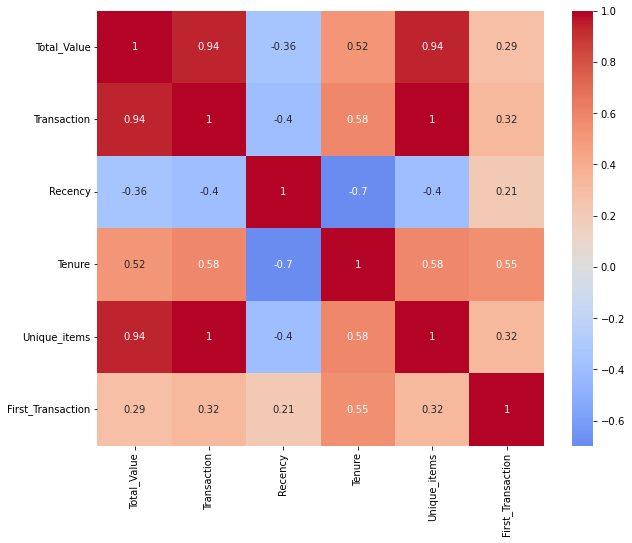

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filtered_df['First_Transaction'] = pd.to_numeric(df['First_Transaction'], errors='coerce')

# Calculate correlations
correlation = filtered_df[['Total_Value',"Transaction", 'Recency', 'Tenure', 'Unique_items', 'First_Transaction']].corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

plt.show()


In [ ]:
# Calculate correlations
correlation = new_df[['Total_Value', 'Months_With_Transactions', 'Price_Per_Item', 'Items_Per_Transaction', "Earliest_Transaction", "Latest_Transaction", "Per_Transaction_Value", "Unique_Items"]].corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)

plt.show()

In [11]:
processed_df = filtered_df[['customer_id','Total_Value',"Transaction", 'Recency', 'Tenure', 'Unique_items','First_Transaction']].copy()
processed_df.set_index('customer_id', inplace=True)

processed_df

,Total_Value,Transaction,Recency,Tenure,Unique_items,First_Transaction
customer_id,,,,,,
0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5c2d5cd5f5f3c9a4488,82.94,7.0,440.0,18.0,7.0,458.0
000114c6996ef5703a8d455faf2103f8488d3928348e0739c92ff9e8897932db,198.82,18.0,94.0,486.0,18.0,580.0
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,15025.47,555.0,8.0,714.0,555.0,722.0
00053f544468004bd5b18b25ae8faad7c9a2f71c34e7cdead6494a1e5c59ff89,50.06,3.0,59.0,232.0,3.0,291.0
000aa9a7d9f776173f87d58e834e4dd36f3a2d7908ae4750690224f1055909f3,234.79,21.0,263.0,323.0,21.0,586.0
...,...,...,...,...,...,...
fffb00d134c84e6b71d3734c5261305fd2b1d200db0d17282805808a10e33a0f,53.96,4.0,169.0,0.0,4.0,169.0
fffbe1daa0362090117b76308b8e52266db42e32ee1e7b437fd6f6fa2f543589,4.99,1.0,663.0,0.0,1.0,663.0
fffc76781a1ef4866728c8f7d1b38be48818ec4d0d6dda5a46b0185629bb2e2e,19.99,1.0,544.0,0.0,1.0,544.0


In [12]:
processed_df.describe()

,Total_Value,Transaction,Recency,Tenure,Unique_items,First_Transaction
count,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000
mean,497.511053,26.601744,244.624188,301.723289,26.601744,546.347477
std,910.697355,42.129977,237.515960,278.021928,42.129977,204.124640
min,0.890000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,59.980000,4.000000,41.000000,0.000000,4.000000,448.000000
50%,175.900000,11.000000,135.000000,275.000000,11.000000,636.000000
75%,533.170000,31.000000,439.000000,593.000000,31.000000,703.000000
max,17700.230000,765.000000,733.000000,733.000000,765.000000,733.000000


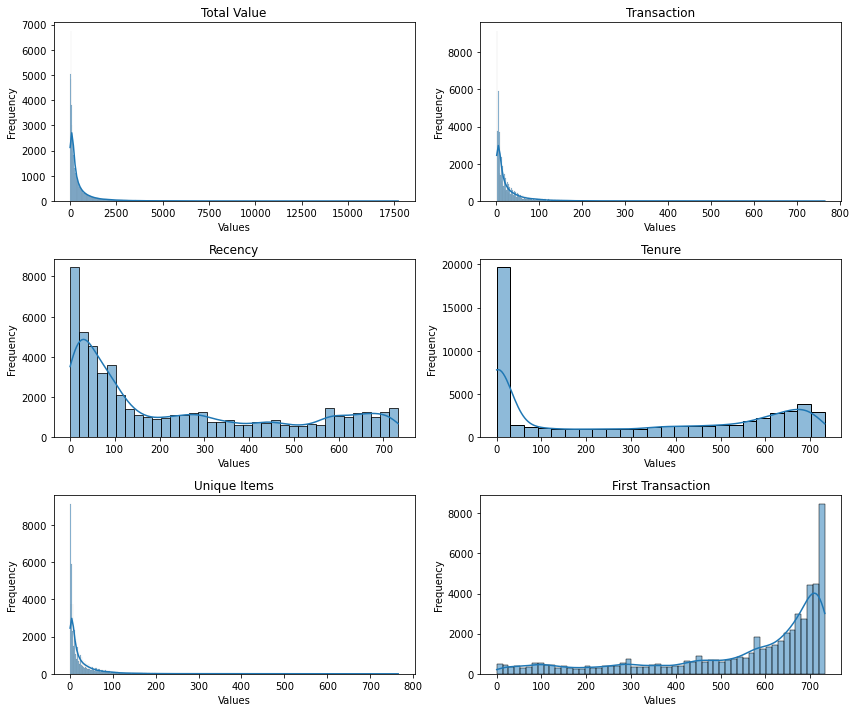

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Plot distribution 1
sns.histplot(data= processed_df, x='Total_Value', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Total Value')
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Frequency')
# axes[0, 0].set_xlim(0, 6000)

# Plot distribution 2
sns.histplot(data= processed_df, x='Transaction', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Transaction')
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Frequency')
# axes[0, 1].set_xlim(0, 13)

# Plot distribution 3
sns.histplot(data= processed_df, x='Recency', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Recency')
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Frequency')
# axes[1, 0].set_xlim(0, 20)

# Plot distribution 4
sns.histplot(data= processed_df, x='Tenure', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Tenure')
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Frequency')
# axes[1, 1].set_xlim(0, 400)

# Plot distribution 5
sns.histplot(data= processed_df, x='Unique_items', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Unique Items')
axes[2, 0].set_xlabel('Values')
axes[2, 0].set_ylabel('Frequency')
# axes[2, 1].set_xlim(0, 400)

# Plot distribution 6
sns.histplot(data= processed_df, x='First_Transaction', kde=True, ax=axes[2, 1])
axes[2, 1].set_title('First Transaction')
axes[2, 1].set_xlabel('Values')
axes[2, 1].set_ylabel('Frequency')
# axes[2, 1].set_xlim(0, 400)



# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()



In [19]:
processed_df['Tr_Total_Value'] = np.log(processed_df['Total_Value'])
processed_df['Tr_Transaction'] = np.log(processed_df['Transaction'])
processed_df['Tr_Unique_Items'] = np.log(processed_df['Unique_items'])
processed_df['Tr_First_Transaction'] = np.log((processed_df['First_Transaction'])+1)

processed_df['Tr_Recency'] = np.log((processed_df['Recency'])+1)
processed_df['Tr_Tenure'] = np.log((processed_df['Tenure'])+1)
                                        
processed_df

,Total_Value,Transaction,Recency,Tenure,Unique_items,First_Transaction,Tr_Total_Value,Tr_Transaction,Tr_Unique_Items,Tr_First_Transaction,Tr_Recency,Tr_Tenure
customer_id,,,,,,,,,,,,
0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5c2d5cd5f5f3c9a4488,82.94,7.0,440.0,18.0,7.0,458.0,4.418117,1.945910,1.945910,6.129050,6.089045,2.944439
000114c6996ef5703a8d455faf2103f8488d3928348e0739c92ff9e8897932db,198.82,18.0,94.0,486.0,18.0,580.0,5.292400,2.890372,2.890372,6.364751,4.553877,6.188264
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,15025.47,555.0,8.0,714.0,555.0,722.0,9.617502,6.318968,6.318968,6.583409,2.197225,6.572283
00053f544468004bd5b18b25ae8faad7c9a2f71c34e7cdead6494a1e5c59ff89,50.06,3.0,59.0,232.0,3.0,291.0,3.913222,1.098612,1.098612,5.676754,4.094345,5.451038
000aa9a7d9f776173f87d58e834e4dd36f3a2d7908ae4750690224f1055909f3,234.79,21.0,263.0,323.0,21.0,586.0,5.458691,3.044522,3.044522,6.375025,5.575949,5.780744
...,...,...,...,...,...,...,...,...,...,...,...,...
fffb00d134c84e6b71d3734c5261305fd2b1d200db0d17282805808a10e33a0f,53.96,4.0,169.0,0.0,4.0,169.0,3.988243,1.386294,1.386294,5.135798,5.135798,0.000000
fffbe1daa0362090117b76308b8e52266db42e32ee1e7b437fd6f6fa2f543589,4.99,1.0,663.0,0.0,1.0,663.0,1.607436,0.000000,0.000000,6.498282,6.498282,0.000000
fffc76781a1ef4866728c8f7d1b38be48818ec4d0d6dda5a46b0185629bb2e2e,19.99,1.0,544.0,0.0,1.0,544.0,2.995232,0.000000,0.000000,6.300786,6.300786,0.000000


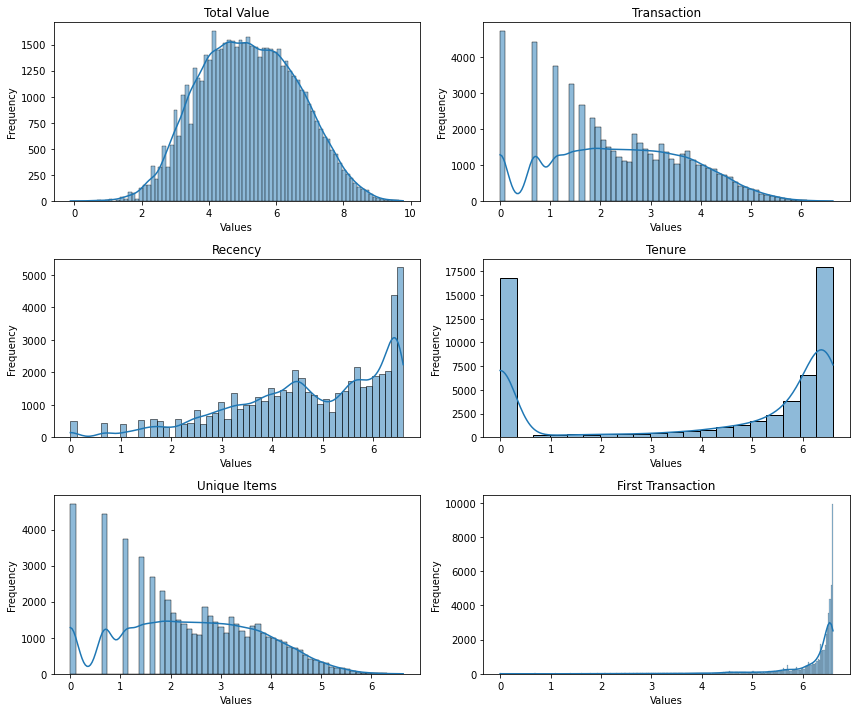

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Plot distribution 1
sns.histplot(data= processed_df, x='Tr_Total_Value', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Total Value')
axes[0, 0].set_xlabel('Values')
axes[0, 0].set_ylabel('Frequency')
# axes[0, 0].set_xlim(0, 6000)

# Plot distribution 2
sns.histplot(data= processed_df, x='Tr_Transaction', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Transaction')
axes[0, 1].set_xlabel('Values')
axes[0, 1].set_ylabel('Frequency')
# axes[0, 1].set_xlim(0, 13)

# Plot distribution 3
sns.histplot(data= processed_df, x='Tr_Recency', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Recency')
axes[1, 0].set_xlabel('Values')
axes[1, 0].set_ylabel('Frequency')
# axes[1, 0].set_xlim(0, 20)

# Plot distribution 4
sns.histplot(data= processed_df, x='Tr_Tenure', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Tenure')
axes[1, 1].set_xlabel('Values')
axes[1, 1].set_ylabel('Frequency')
# axes[1, 1].set_xlim(0, 400)

# Plot distribution 5
sns.histplot(data= processed_df, x='Tr_Unique_Items', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Unique Items')
axes[2, 0].set_xlabel('Values')
axes[2, 0].set_ylabel('Frequency')
# axes[2, 1].set_xlim(0, 400)

# Plot distribution 6
sns.histplot(data= processed_df, x='Tr_First_Transaction', kde=True, ax=axes[2, 1])
axes[2, 1].set_title('First Transaction')
axes[2, 1].set_xlabel('Values')
axes[2, 1].set_ylabel('Frequency')
# axes[2, 1].set_xlim(0, 400)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


In [21]:
processed_df.describe()

,Total_Value,Transaction,Recency,Tenure,Unique_items,First_Transaction,Tr_Total_Value,Tr_Transaction,Tr_Unique_Items,Tr_First_Transaction,Tr_Recency,Tr_Tenure
count,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000,56185.000000
mean,497.511053,26.601744,244.624188,301.723289,26.601744,546.347477,5.203433,2.396147,2.396147,6.140765,4.730941,3.986450
std,910.697355,42.129977,237.515960,278.021928,42.129977,204.124640,1.458653,1.379134,1.379134,0.767196,1.518186,2.793266
min,0.890000,1.000000,0.000000,0.000000,1.000000,0.000000,-0.116534,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.980000,4.000000,41.000000,0.000000,4.000000,448.000000,4.094011,1.386294,1.386294,6.107023,3.737670,0.000000
50%,175.900000,11.000000,135.000000,275.000000,11.000000,636.000000,5.169916,2.397895,2.397895,6.456770,4.912655,5.620401
75%,533.170000,31.000000,439.000000,593.000000,31.000000,703.000000,6.278840,3.433987,3.433987,6.556778,6.086775,6.386879
max,17700.230000,765.000000,733.000000,733.000000,765.000000,733.000000,9.781333,6.639876,6.639876,6.598509,6.598509,6.598509


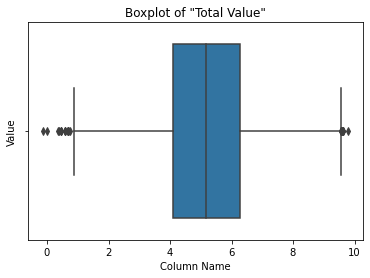

In [22]:
sns.boxplot(x=processed_df['Tr_Total_Value'])

# Adding labels and title
plt.xlabel('Column Name')
plt.ylabel('Value')
plt.title('Boxplot of "Total Value"')

# Display the plot
plt.show()

In [ ]:
# high = processed_df['Tr_Total_Value'].quantile(0.9975)
# low = processed_df['Tr_Total_Value'].quantile(0.0025)

# # only keep rows in the dataframe that are within the desired quantiles
# outlier_removed_df = processed_df[(processed_df['Tr_Total_Value'] < high) & (processed_df['Tr_Total_Value'] > low)]

In [31]:
# # silhouette_score = 0.378 for K = 4
# kmeans_df = processed_df[['Tr_Total_Value', 'Tr_Months_With_Transactions', "Tr_Latest_Transaction"]].copy()

# # silhouette_score = 0.361 for K = 4
# kmeans_df = processed_df[['Tr_Total_Value', 'Tr_Months_With_Transactions', "Tr_Latest_Transaction", "Tr_Price_Per_Item"]].copy()

# # silhouette_score = 0.347 for K = 4
# kmeans_df = processed_df[['Tr_Total_Value', 'Tr_Months_With_Transactions', "Tr_Latest_Transaction", "Tr_Per_Transaction_Value"]].copy()

# # silhouette_score = 0.340 for K = 4
# kmeans_df = processed_df[['Tr_Total_Value', 'Tr_Months_With_Transactions', "Tr_Latest_Transaction", "Tr_Unique_Items"]].copy()

# silhouette_score = 0.435 for K = 4
kmeans_df = processed_df[['Tr_First_Transaction', "Tr_Recency", "Tr_Total_Value"]].copy()

# # silhouette_score = 0.340 for K = 4
# kmeans_df = processed_df[['Tr_Total_Value', 'Tr_Months_With_Transactions', "Tr_Latest_Transaction", "Items_Per_Transaction"]].copy()

kmeans_df.describe()

,Tr_First_Transaction,Tr_Recency,Tr_Total_Value
count,56185.000000,56185.000000,56185.000000
mean,6.140765,4.730941,5.203433
std,0.767196,1.518186,1.458653
min,0.000000,0.000000,-0.116534
25%,6.107023,3.737670,4.094011
50%,6.456770,4.912655,5.169916
75%,6.556778,6.086775,6.278840
max,6.598509,6.598509,9.781333


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

kmeans = KMeans(n_clusters=4, random_state=2042)
X = MinMaxScaler().fit_transform(kmeans_df)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.42625690196629823


In [48]:
cluster_labels = kmeans.labels_
cluster_sizes = pd.Series(cluster_labels).value_counts()

print(cluster_sizes)

processed_df['Cluster']  = labels
processed_df['Per_Transaction_Value'] = processed_df['Total_Value']/ processed_df['Transaction']
processed_df



3    23955
1    17475
2     9592
0     5163
dtype: int64


,Total_Value,Transaction,Recency,Tenure,Unique_items,First_Transaction,Tr_Total_Value,Tr_Transaction,Tr_Unique_Items,Tr_First_Transaction,Tr_Recency,Tr_Tenure,Cluster,Per_Transaction_Value
customer_id,,,,,,,,,,,,,,
0000d6c053fc8f9389d4565051f12402d5774aa4a9d2e5c2d5cd5f5f3c9a4488,82.94,7.0,440.0,18.0,7.0,458.0,4.418117,1.945910,1.945910,6.129050,6.089045,2.944439,3,11.848571
000114c6996ef5703a8d455faf2103f8488d3928348e0739c92ff9e8897932db,198.82,18.0,94.0,486.0,18.0,580.0,5.292400,2.890372,2.890372,6.364751,4.553877,6.188264,1,11.045556
0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37e011580a479e80aa94,15025.47,555.0,8.0,714.0,555.0,722.0,9.617502,6.318968,6.318968,6.583409,2.197225,6.572283,2,27.072919
00053f544468004bd5b18b25ae8faad7c9a2f71c34e7cdead6494a1e5c59ff89,50.06,3.0,59.0,232.0,3.0,291.0,3.913222,1.098612,1.098612,5.676754,4.094345,5.451038,0,16.686667
000aa9a7d9f776173f87d58e834e4dd36f3a2d7908ae4750690224f1055909f3,234.79,21.0,263.0,323.0,21.0,586.0,5.458691,3.044522,3.044522,6.375025,5.575949,5.780744,3,11.180476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffb00d134c84e6b71d3734c5261305fd2b1d200db0d17282805808a10e33a0f,53.96,4.0,169.0,0.0,4.0,169.0,3.988243,1.386294,1.386294,5.135798,5.135798,0.000000,3,13.490000
fffbe1daa0362090117b76308b8e52266db42e32ee1e7b437fd6f6fa2f543589,4.99,1.0,663.0,0.0,1.0,663.0,1.607436,0.000000,0.000000,6.498282,6.498282,0.000000,3,4.990000
fffc76781a1ef4866728c8f7d1b38be48818ec4d0d6dda5a46b0185629bb2e2e,19.99,1.0,544.0,0.0,1.0,544.0,2.995232,0.000000,0.000000,6.300786,6.300786,0.000000,3,19.990000


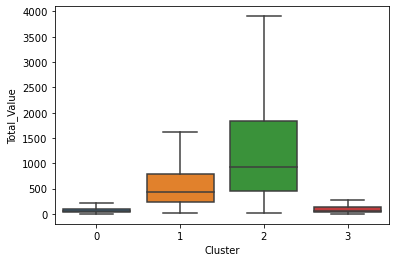

Median Total Value for each cluster:
Cluster
0     58.360
1    430.070
2    928.455
3     66.530
Name: Total_Value, dtype: float64


In [49]:
sns.boxplot(x='Cluster', y='Total_Value', data=processed_df, showfliers=False)
plt.show()
medians = processed_df.groupby(['Cluster'])['Total_Value'].median()

# Print the medians
print("Median Total Value for each cluster:")
print(medians)

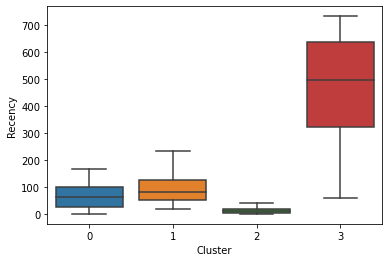

Median Recency for each cluster:
Cluster
0     62.0
1     82.0
2     12.0
3    495.0
Name: Recency, dtype: float64


In [50]:
sns.boxplot (x = 'Cluster', y = 'Recency', data = processed_df, showfliers=False)
plt.show()
medians = processed_df.groupby(['Cluster'])['Recency'].median()

# Print the medians
print("Median Recency for each cluster:")
print(medians)

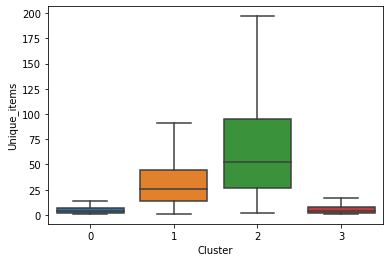

Median Unique Items for each cluster:
Cluster
0     4.0
1    26.0
2    52.0
3     4.0
Name: Unique_items, dtype: float64


In [51]:
sns.boxplot (x = 'Cluster', y = 'Unique_items', data = processed_df, showfliers=False)
plt.show()

medians = processed_df.groupby(['Cluster'])['Unique_items'].median()

# Print the medians
print("Median Unique Items for each cluster:")
print(medians)

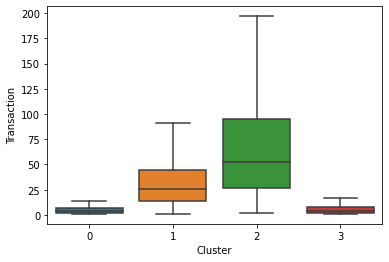

Median Transaction for each cluster:
Cluster
0     4.0
1    26.0
2    52.0
3     4.0
Name: Transaction, dtype: float64


In [55]:
sns.boxplot (x = 'Cluster', y = 'Transaction', data = processed_df, showfliers=False)
plt.show()
medians = processed_df.groupby(['Cluster'])['Transaction'].median()

# Print the medians
print("Median Transaction for each cluster:")
print(medians)

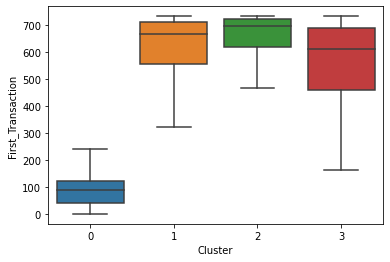

Median First Transaction for each cluster:
Cluster
0     87.0
1    668.0
2    697.0
3    612.0
Name: First_Transaction, dtype: float64


In [53]:
sns.boxplot (x = 'Cluster', y = 'First_Transaction', data = processed_df, showfliers=False)
plt.show()

medians = processed_df.groupby(['Cluster'])['First_Transaction'].median()

# Print the medians
print("Median First Transaction for each cluster:")
print(medians)

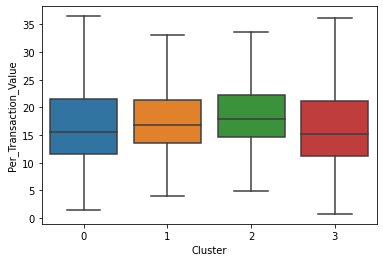

Median Per Transaction Value for each cluster:
Cluster
0    15.480909
1    16.903333
2    17.952857
3    15.156667
Name: Per_Transaction_Value, dtype: float64


In [54]:
sns.boxplot (x = 'Cluster', y = 'Per_Transaction_Value', data = processed_df, showfliers=False)
plt.show()
medians = processed_df.groupby(['Cluster'])['Per_Transaction_Value'].median()

# Print the medians
print("Median Per Transaction Value for each cluster:")
print(medians)

In [ ]:
df = df.merge(processed_df[['Cluster']], left_on='CUST NAME', right_index=True)

df.to_csv('df_with_cluster.csv', index=False)

In [ ]:
processed_df.reset_index(inplace=True)
processed_df.to_csv('kmeans_clustering_first.csv', index=False)

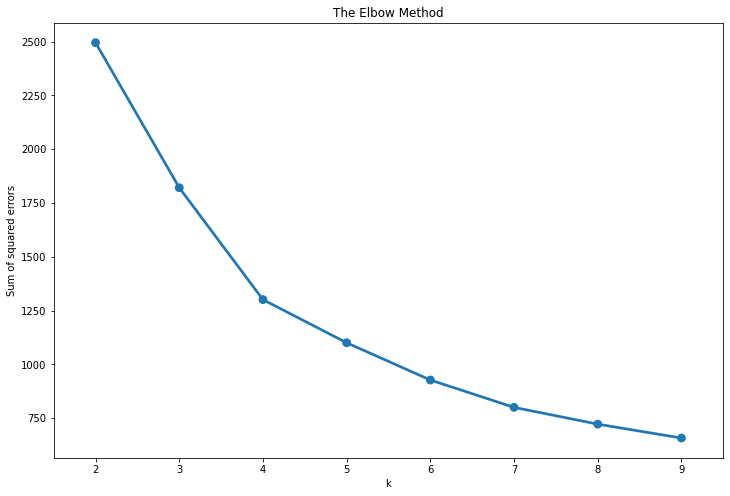

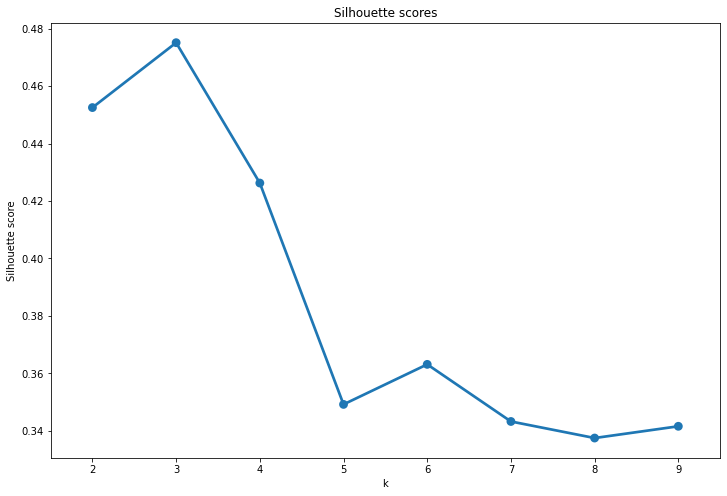

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

sse = {}
silhouette = {}

# Fit KMeans and calculate SSE and silhouette score for each k
for k in range(2, 10): # silhouette_score requires at least 2 clusters
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, max_iter = 500, random_state=2042)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

    # Predict the cluster labels for the dataset
    labels = kmeans.predict(X)
    
    # Calculate the silhouette score and add it to the silhouette dictionary
    silhouette[k] = silhouette_score(X, labels)

# Plotting the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(12,8))
plt.title('Silhouette scores')
plt.xlabel('k'); 
plt.ylabel('Silhouette score')
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.show()

In [ ]:
highvalue_df = processed_df[processed_df['Cluster']==1]
highvalue_df

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# silhouette_score = 0.435 for K = 4
kmeans_highvalue_df = highvalue_df[['Tr_Total_Value', 'Tr_Months_With_Transactions', "Tr_Latest_Transaction"]].copy()

kmeans = KMeans(n_clusters=3, random_state=2042)
Y = MinMaxScaler().fit_transform(kmeans_highvalue_df)
kmeans.fit(Y)

# Get the cluster labels
labels = kmeans.labels_

# Calculate the silhouette score
silhouette_avg = silhouette_score(Y, labels)
print("Silhouette Score:", silhouette_avg)


In [ ]:
cluster_labels = kmeans.labels_
cluster_sizes = pd.Series(cluster_labels).value_counts()

print(cluster_sizes)

highvalue_df['Cluster']  = labels
highvalue_df['Average_Month_Value'] = highvalue_df['Total_Value']/ highvalue_df['Months_With_Transactions']


In [ ]:
sns.boxplot(x='Cluster', y='Total_Value', data=highvalue_df, showfliers=False)
plt.show()
medians = highvalue_df.groupby(['Cluster'])['Total_Value'].median()

# Print the medians
print("Median Total Value for each cluster:")
print(medians)

In [ ]:
sns.boxplot(x='Cluster', y='Latest_Transaction', data=highvalue_df, showfliers=False)
plt.show()
medians = highvalue_df.groupby(['Cluster'])['Latest_Transaction'].median()

# Print the medians
print("Median Latest Transaction for each cluster:")
print(medians)

In [ ]:
sns.boxplot(x='Cluster', y='Per_Transaction_Value', data=highvalue_df, showfliers=False)
plt.show()
medians = highvalue_df.groupby(['Cluster'])['Per_Transaction_Value'].median()

# Print the medians
print("Median Per Transaction Value for each cluster:")
print(medians)

In [ ]:
sns.boxplot(x='Cluster', y='Earliest_Transaction', data=highvalue_df, showfliers=False)
plt.show()
medians = highvalue_df.groupby(['Cluster'])['Earliest_Transaction'].median()

# Print the medians
print("Median Earliest Transaction for each cluster:")
print(medians)

In [ ]:
sns.boxplot(x='Cluster', y='Transactions', data=highvalue_df, showfliers=False)
plt.show()
medians = highvalue_df.groupby(['Cluster'])['Transactions'].median()

# Print the medians
print("Median Transactions for each cluster:")
print(medians)

In [ ]:
sns.boxplot(x='Cluster', y='Months_With_Transactions', data=highvalue_df, showfliers=False)
plt.show()
medians = highvalue_df.groupby(['Cluster'])['Months_With_Transactions'].median()

# Print the medians
print("Median Months_With_Transaction for each cluster:")
print(medians)

In [ ]:
sns.boxplot(x='Cluster', y='Average_Month_Value', data=highvalue_df, showfliers=False)
plt.show()
medians = highvalue_df.groupby(['Cluster'])['Average_Month_Value'].median()

# Print the medians
print("Median Average_Month_Value for each cluster:")
print(medians)

In [ ]:

highvalue_df.to_csv('kmeans_clustering_second.csv', index=False)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

sse = {}
silhouette = {}

# Fit KMeans and calculate SSE and silhouette score for each k
for k in range(2, 10): # silhouette_score requires at least 2 clusters
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, max_iter = 500, random_state=2042)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(Y)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

    # Predict the cluster labels for the dataset
    labels = kmeans.predict(Y)
    
    # Calculate the silhouette score and add it to the silhouette dictionary
    silhouette[k] = silhouette_score(Y, labels)

# Plotting the elbow plot
plt.figure(figsize=(12,8))
plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(12,8))
plt.title('Silhouette scores')
plt.xlabel('k'); 
plt.ylabel('Silhouette score')
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.show()